# MATH123-Midterm2
Ethan Harvey

In [1]:
import numpy as np
import pandas as pd

from scipy.spatial.distance import cdist, pdist, squareform
from sklearn.metrics import silhouette_score

import matplotlib
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### Question 1

(a) An example of a dataset $X$ for which $d^{*}$ would be very small is a dataset where few linear directions are important and help distinguish our data.

(b) An example of a dataset $X$ for which $d^{*}$ would be very large is a dataset where each linear directions is important and helps distinguish our data.

(c) All the eigenvalues associate with the $D \times D$ identity matrix are one.

(d) If $D=17$ for the dataset $X$ decribed in part (c), the value of $d^{*}$ is 17 since $16/17=0.94117647058$.

(e) If $D=1524$ for the dataset $X$ decribed in part (c), the value of $d^{*}$ is 1448 since $1447/1524=0.94947506561$ and $1448/1524=0.95013123359$.

### Question 2

(a)

In [2]:
def init_centroids(data, n_clusters):
    centroids = []
    # randomly initialize first centroid
    index = np.random.randint(len(data))
    centroids.append(data[index,:])
    new_data = np.delete(data, [index], axis=0)
    
    for _ in range(n_clusters-1):
        distances = cdist(new_data, centroids, "sqeuclidean")
        minimum_distance_vector = np.min(distances, axis=1)
        probability_vector = minimum_distance_vector/sum(minimum_distance_vector)
        cumsum_probability_vector = np.cumsum(probability_vector)
        r = np.random.uniform(low=0, high=1)
        # get first smallest
        index = int(np.argwhere(np.array(cumsum_probability_vector)>=r)[0])
        centroids.append(new_data[index,:])
        new_data = np.delete(new_data, [index], axis=0)
        
    return centroids

def kmeans(data, n_clusters):
    centroids = init_centroids(data, n_clusters)
    # iterate
    centroids = np.array(centroids)
    old_centroids = np.array([np.array([0,0]) for i in range(n_clusters)])
    
    while not np.all(old_centroids-centroids == 0):
        distances = cdist(data, centroids, "sqeuclidean")
        labels = np.argmin(distances, axis=1)
        # update centroids
        old_centroids = centroids
        centroids = np.array([np.average(data[labels==cluster],axis=0) for cluster in range(n_clusters)])        
        
    return centroids, labels

(b)

In [3]:
def centered_and_scaled(X):
    centered = np.array([X[:,i]-X[:,i].mean() for i in range(X.shape[1])]).T
    scaled = np.array([centered[:,i]/centered[:,i].std() if not centered[:,i].std() == 0 else centered[:,i] for i in range(X.shape[1])]).T
    return scaled

In [4]:
data = pd.read_csv("data/Mall_Customers.csv").to_numpy()
genders = data[:,1].reshape((data[:,1].shape[0],1))
normalized_data = np.append(genders,centered_and_scaled(data[:,2:5]),axis=1)
two_dimensional_data = normalized_data[:,2:4]
print(two_dimensional_data)

[[-1.7389991930659474 -0.43480147996914836]
 [-1.7389991930659474 1.1957040699151575]
 [-1.700829763894175 -1.7159129834496745]
 [-1.700829763894175 1.0404178270690332]
 [-1.6626603347224027 -0.3959799192576173]
 [-1.6626603347224027 1.001596266357502]
 [-1.6244909055506305 -1.7159129834496745]
 [-1.6244909055506305 1.7003843591650618]
 [-1.586321476378858 -1.8323776655842676]
 [-1.586321476378858 0.8463100235113777]
 [-1.586321476378858 -1.4053404977574258]
 [-1.586321476378858 1.8944921627227171]
 [-1.5481520472070858 -1.3665189370458946]
 [-1.5481520472070858 1.0404178270690332]
 [-1.5481520472070858 -1.4441620584689567]
 [-1.5481520472070858 1.1180609484920954]
 [-1.5099826180353133 -0.5900877228152727]
 [-1.5099826180353133 0.6133806592421911]
 [-1.4336437596917688 -0.8230170870844593]
 [-1.4336437596917688 1.8556706020111862]
 [-1.3954743305199964 -0.5900877228152727]
 [-1.3954743305199964 0.8851315842229088]
 [-1.3573049013482241 -1.7547345441612054]
 [-1.3573049013482241 0.8851

(c)

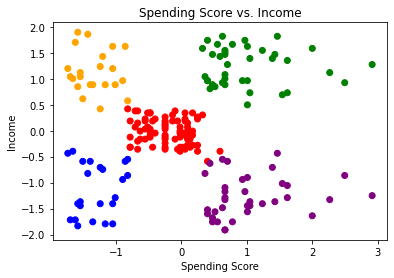

In [5]:
data = two_dimensional_data.astype('float64')
centroids, labels = kmeans(data, 5)
colors = ["blue","orange","green","red","purple"]
colors = [colors[labels[index]] for index in range(len(labels))]
plt.scatter(two_dimensional_data[:,0], two_dimensional_data[:,1], color=colors)
plt.xlabel("Spending Score")
plt.ylabel("Income")
plt.title("Spending Score vs. Income")
plt.show()

(d)

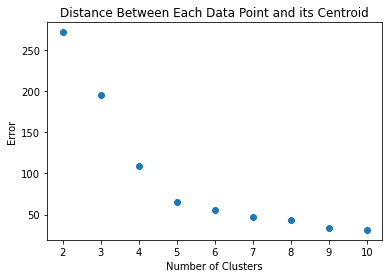

In [6]:
errors = []
for n_clusters in [2,3,4,5,6,7,8,9,10]:
    centroids, labels = kmeans(data, n_clusters)
    distance = cdist(data, centroids, 'sqeuclidean')
    minimum_distance = np.amin(distance, axis=1)
    errors.append(sum(minimum_distance))
plt.scatter([2,3,4,5,6,7,8,9,10], errors)
plt.ylabel("Error")
plt.xlabel("Number of Clusters")
plt.title("Distance Between Each Data Point and its Centroid")
plt.show()

K = 5 is a good number of clusters to pick since the decrease in error is much more significant before this point than after. This point is called the elbow curve.

(e)

In [7]:
def compute_silhouette_score(data, labels):
    silhouette = []
    for index in range(len(data)):
        i = data[index]
        i_label = labels[index]
        new_data = np.delete(data, [index], axis=0)
        new_labels = np.delete(labels, [index], axis=0)
        data_in_cluster = [new_data[new_labels==cluster] for cluster in range(n_clusters)]
        distances = [np.average([np.linalg.norm(datapoint-i) for datapoint in cluster]) for cluster in data_in_cluster]
        a = distances[i_label]
        del distances[i_label]
        b = sorted(distances)[0]
        s = (b-a)/max(a,b)
        silhouette.append(s)
    return np.array(silhouette)

(f)

In [8]:
n_clusters = 5
centroids, labels = kmeans(data, n_clusters)
silhouette = compute_silhouette_score(data, labels)
print(silhouette,"\n")
print("silhouette score:", np.average(silhouette))
# compare silhouette score with sklearn
print("sklearn silhouette score:", silhouette_score(data, labels))

[ 0.11944036  0.70648814  0.29766885  0.70578458  0.13081176  0.70776608
  0.29546506  0.675013    0.26682105  0.67371519  0.34540786  0.62096337
  0.35297055  0.73134511  0.35389602  0.73835827  0.26797477  0.55508664
  0.34449133  0.62265616  0.31248492  0.695002    0.26569528  0.69126403
  0.34748102  0.72815273  0.39171543  0.33581163  0.40902631  0.70534876
  0.22642646  0.64680913  0.20203203  0.60114908  0.32259515  0.67655724
  0.35357827  0.5832193   0.45411092  0.55263221  0.50316441  0.49606276
  0.51259986 -0.05832163  0.47200068  0.20823257  0.25655573  0.44946436
  0.50214694  0.50214694  0.39869585  0.11360592  0.37094443  0.14857364
  0.52572893  0.54725864  0.48142651  0.5322631   0.49974772  0.55950366
  0.38183704  0.41056403  0.49753692  0.30360019  0.52912677  0.32563557
  0.54381973  0.56666225  0.32563557  0.57509222  0.46208145  0.6021097
  0.576368    0.45078394  0.61046541  0.51918226  0.53867351  0.6031532
  0.55574393  0.57895819  0.57049418  0.49715878  0.5

Based on the silhouette coefficient values, k = 5 is a good number of clusters. The average silhouette score is high and there are few scores less than zero which indicates that each object is well matched to its own cluster.

(g)

* The customers in each cluster can be characcterized by their income and spending habits. Depending on the cluster a customer belongs to, a customer can be described as having high income and high spending habits, high income and low spending habits, average income and average spending habits, low income and high spending habits, or low income and low spending habits.

* We should email the customer cluster with high income and high spending habbits. Since the customer cluster has high income and high spending habbits, they are more likely to buy new clothes from a luxury brand.

* We should email the customer cluster with low income and low spending habbits. Since the customer cluster has low income and low spending habbits, they are more likely to buy food at a restaurant chain offering affordable meals.

### Question 3

(a)

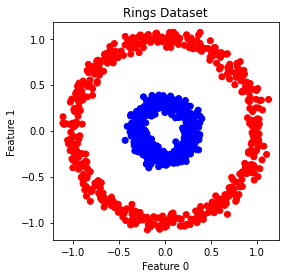

In [9]:
data = pd.read_csv("data/rings.csv").to_numpy()
labels = pd.read_csv("data/rings_labels.csv").to_numpy()
color = [['red','blue'][labels[index][0]] for index in range(len(labels))]
plt.scatter(data[:,0], data[:,1], color=color)
plt.gca().set_aspect('equal')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.title("Rings Dataset")
plt.show()

A regular PCA approach will not be effective in separating these data points into distinct clusters because there is no linear direction that separates the classes.

(b)

In [10]:
def compute_kernel_matrix(X, sigma=1):
    pairwise_sq_dists = squareform(pdist(X, 'sqeuclidean'))
    K = np.exp(-pairwise_sq_dists / (2 * sigma * sigma))
    return K

K = compute_kernel_matrix(data)

(c)

In [11]:
def project_data(X, number_components):
    cov_matrix = (1/len(X))*X.T@X
    eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)
    idx = eigen_values.argsort()[::-1]   
    eigen_values = eigen_values[idx]
    eigen_vectors = eigen_vectors[:,idx]
    pca_vectors = eigen_vectors[:,:number_components]
    return pca_vectors

principle_components = project_data(K, 2)
np.real(principle_components)

array([[ 0.0366759 ,  0.01062827],
       [ 0.03746583,  0.01640167],
       [ 0.02456395,  0.01486042],
       ...,
       [ 0.03760512, -0.01547681],
       [ 0.03674515, -0.00549605],
       [ 0.03681122, -0.0226654 ]])

(d)

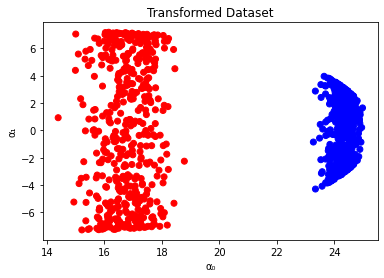

In [12]:
plt.scatter(np.real(principle_components[:,0])@K, np.real(principle_components[:,1])@K, color=color)
plt.xlabel("\u03B1\u2080")
plt.ylabel("\u03B1\u2081")
plt.title("Transformed Dataset")
plt.show()

Clustering on the transformed dataset was successful. The transformed dataset is linearly seperable.

### Question 4

I am going to a concert with my fiancée.